In [1]:
# Recommended import aliases: https://spikeinterface.readthedocs.io/en/latest/getting_started/plot_getting_started.html
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
# Additional imports
import os.path as op
import neo  # neo for some direct reading to check on # of segments etc
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import json

In [2]:
sample_file = 'D:/M142-2020-10-01-CDOD2/M142-2020-10-01-CSC02.ncs'
dname = (op.dirname(sample_file))

reader = neo.NeuralynxIO(dirname=dname)
print(reader)

NeuralynxIO: D:/M142-2020-10-01-CDOD2
nb_block: 1
nb_segment:  [8]
signal_channels: [CSC1, CSC10, CSC11, CSC12 ... CSC64 CSC7 CSC8 CSC9]
unit_channels: [chTT1#0#0, chTT1#58#0, chTT1#40#0, chTT1#59#0 ... chTT9#29#0 chTT9#24#0 chTT9#30#0 chTT9#25#0]
event_channels: [Events event_id=11 ttl=0, Events event_id=11 ttl=1, Events event_id=11 ttl=2, Events event_id=11 ttl=4 ... Events event_id=11 ttl=40 Events event_id=11 ttl=48 Events event_id=11 ttl=64 Events event_id=19 ttl=0]



In [3]:
recordingList = [se.NeuralynxRecordingExtractor(dirname=op.dirname(sample_file), seg_index=i) for i in range(reader.segment_count(0))]

# This concatenates mutiple segments together
recordingFull = se.MultiRecordingTimeExtractor(recordingList)

In [4]:
# Load probe file
recording_probe = recordingFull.load_probe_file('probe_files/CN_Assy77_P1.prb')

In [5]:
# Adding labels (CSC names) to channels from neo Neuralynx header
for ad_ch in recording_probe.get_channel_ids():
    csc_idx = np.where(reader.header['signal_channels']['id'] == ad_ch)
#     print(reader.header['signal_channels']['name'][csc_idx])
    recording_probe.set_channel_property(ad_ch, 'label', reader.header['signal_channels']['name'][csc_idx][0])

In [6]:
# Assigning groups (TT num) to channels from neo Neuralynx header
for ch in reader.header['unit_channels']:
    tetrode = int(re.search('(?<=TT)(.*?)(?=#)', ch[0]).group(0))
    ad_ch = int(re.search('(?<=#)(.*?)(?=#)', ch[0]).group(0))
    recording_probe.set_channel_property(ad_ch, 'group', tetrode)

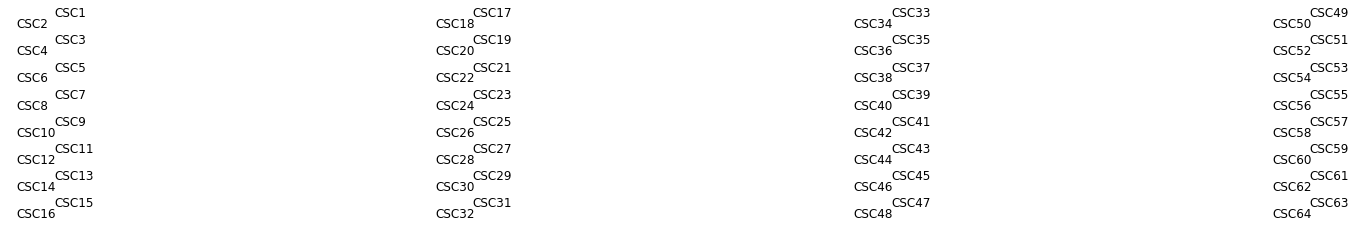

In [7]:
# Sanity check to see that the relative locations of the various channels match that of the images above
xcoords = [pos[0] for pos in recording_probe.get_channel_locations()]
ycoords = [pos[1] for pos in recording_probe.get_channel_locations()]
labels = [recording_probe.get_channel_property(i, 'label') for i in recording_probe.get_channel_ids()]
fig,ax = plt.subplots()
ax.axis('off')
for i in range(len(xcoords)):
    plt.text(xcoords[i]/200,ycoords[i]/200,labels[i],fontsize='large')

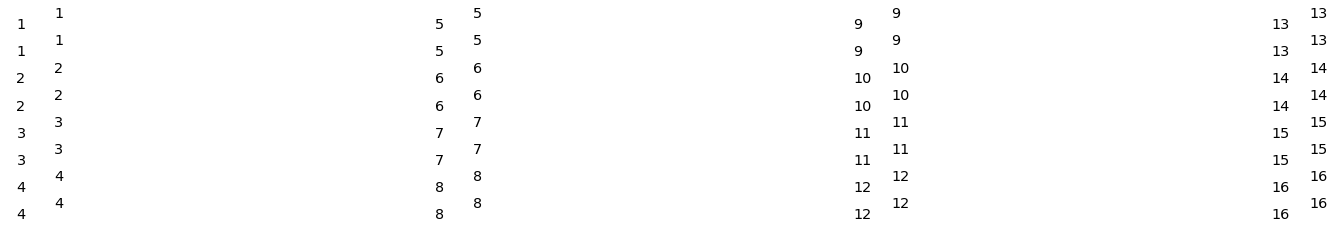

In [8]:
# Sanity check to see that the relative locations of the various channels match that of the images above
xcoords = [pos[0] for pos in recording_probe.get_channel_locations()]
ycoords = [pos[1] for pos in recording_probe.get_channel_locations()]
labels = [recording_probe.get_channel_property(i, 'group') for i in recording_probe.get_channel_ids()]
fig,ax = plt.subplots()
ax.axis('off')
for i in range(len(xcoords)):
    plt.text(xcoords[i]/200,ycoords[i]/200,labels[i],fontsize='x-large')